<a href="https://colab.research.google.com/github/PAVAN143258/YBI_PROJECTS/blob/main/Project_6_IBM_Employee_Attrition_and_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics Employee Attrition Project

In this project, we perform a complete machine learning work flow from data exploratory and feature engineering to build different machine learning models and evaluate model performances to predict if an employee will leave his/her current employer and analyze what features will main affect employee's attrition activity.

#### Contents of the project

1. Data Exporatory and analysis
2. Feature engineering
3. Model training and performance evaluations
4. Feature importance analysis

#### 1. Data Exporatory

In this part, we mainly focus on exploring the whole dataset to find out important insights from the dataset such as duplicate observations, null or missing data, find correlations between different features, statistical distribution of different features.

In [1]:
# importing essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset and take a brief look of the dataset
df = pd.read_csv('/content/IBMHRAnalyticsEmployeeAttritionAndPerformance (1).csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
# helper function to get shape of the dataset
def get_shape(df):
    print('Now there are', df.shape[0], 'rows and',df.shape[1],'columns in this dataset')

In [4]:
# print out the shape of the dataset
get_shape(df)

Now there are 1470 rows and 35 columns in this dataset


In [5]:
# count unique values of each features
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

It looks like column 'EmployeeNumber' is an unique ID column and has identical ID number related to different employees. We will drop this column since it does give out any useful information. 

In [6]:
# check missing data for each feature
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Thank God there is no null data in this dataset and we do not need to worry about filling up missing data.

In [7]:
# check datatype and other information for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# separate features into numerical and non numerical groups
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [9]:
# check statistical distribution for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


If we dig into numerical data we will find out some interesting information.
1. Column 'EmployeeCount' is all 1s which indicate every observation is linked with 1 employee only, thanks for this info and we will drop it.
2. Column 'StandardHours' is all 80s which means everyone in this dataset works as a fulltime employee and we could definitely drop it as well.
3. Column 'Over18' is another interesting column which tells us every employee in this dataset is over 18 and we will drop it as well. 

In [10]:
# drop out features that give out useless information
df = df.drop(columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


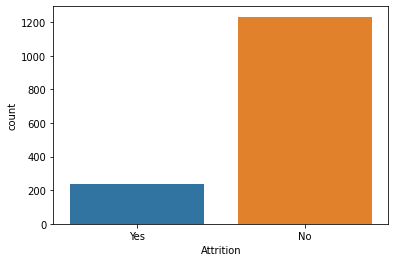

In [11]:
# check distribution for target variable
sns.countplot(x = 'Attrition', data = df);
plt.savefig('attrition.png')

The distribution of column 'Attrition' is quite imbalanced. 

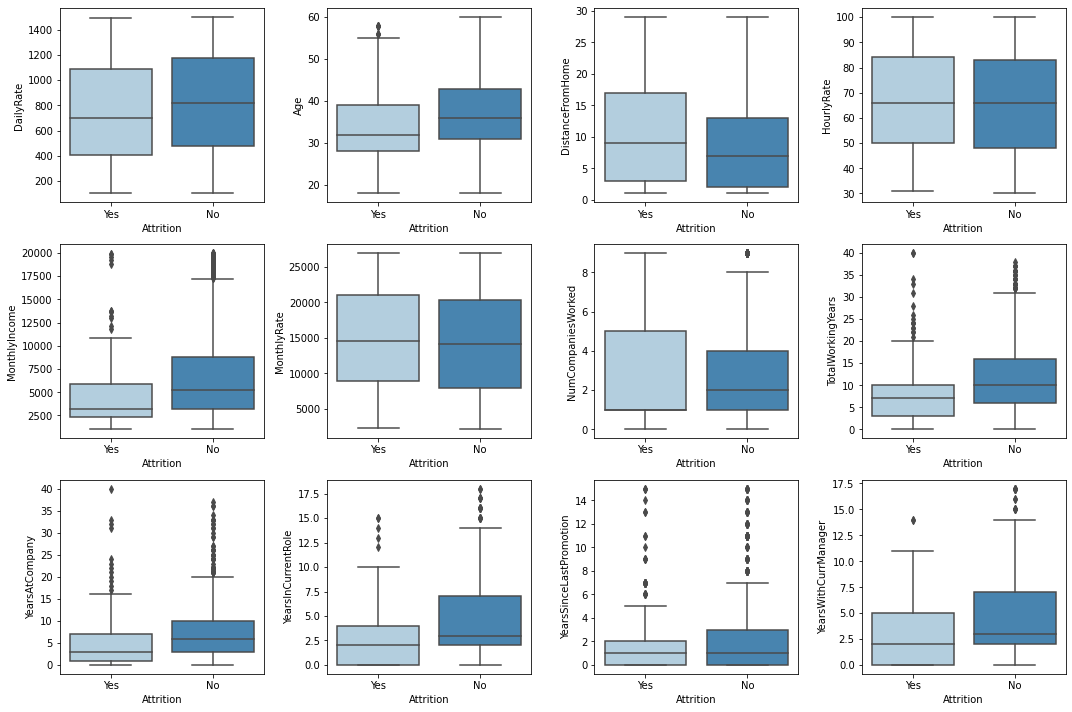

In [12]:
# visualization for numerical features
fig, axss = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='DailyRate', data=df, ax=axss[0][0],palette="Blues")
sns.boxplot(x='Attrition', y ='Age', data=df, ax=axss[0][1],palette="Blues")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=df, ax=axss[0][2],palette="Blues")
sns.boxplot(x='Attrition', y ='HourlyRate', data=df, ax=axss[0][3],palette="Blues")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=df, ax=axss[1][0],palette="Blues")
sns.boxplot(x='Attrition', y ='MonthlyRate', data=df, ax=axss[1][1],palette="Blues")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=df, ax=axss[1][2],palette="Blues")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=df, ax=axss[1][3],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=df, ax=axss[2][0],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=df, ax=axss[2][1],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=df, ax=axss[2][2],palette="Blues")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=df, ax=axss[2][3],palette="Blues")
plt.tight_layout()
plt.savefig('numerical_dist.png');

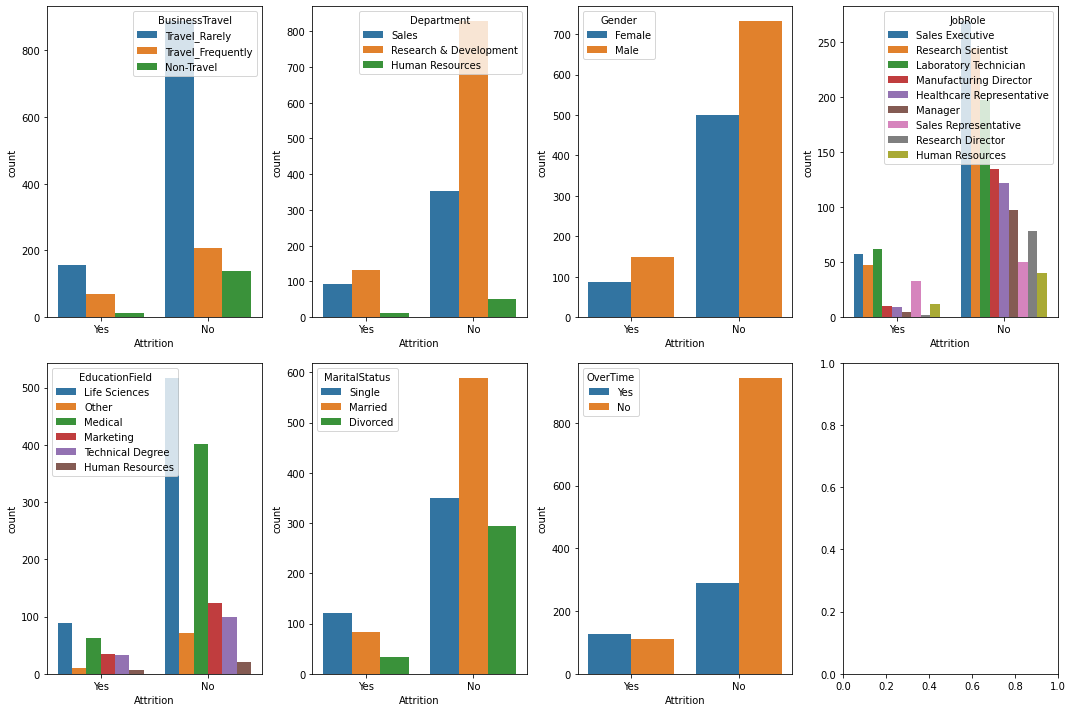

In [13]:
# visualization for non numerical features
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=df, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=df, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=df, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=df, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=df, ax=axss[1][2])
plt.tight_layout()
plt.savefig('cate_dist.png');

#### 2. Feature engineering

For feature engineering, we would like to check correlations between each features and tranform non numerical feature into numerical by different ways such as encoding so that we could be able to feed the feature to the model.

In [14]:
# tranform binary feature into 0 and 1
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

In [15]:
# check correlation between numerical features and target variable
corr_score = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr()
corr_score

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


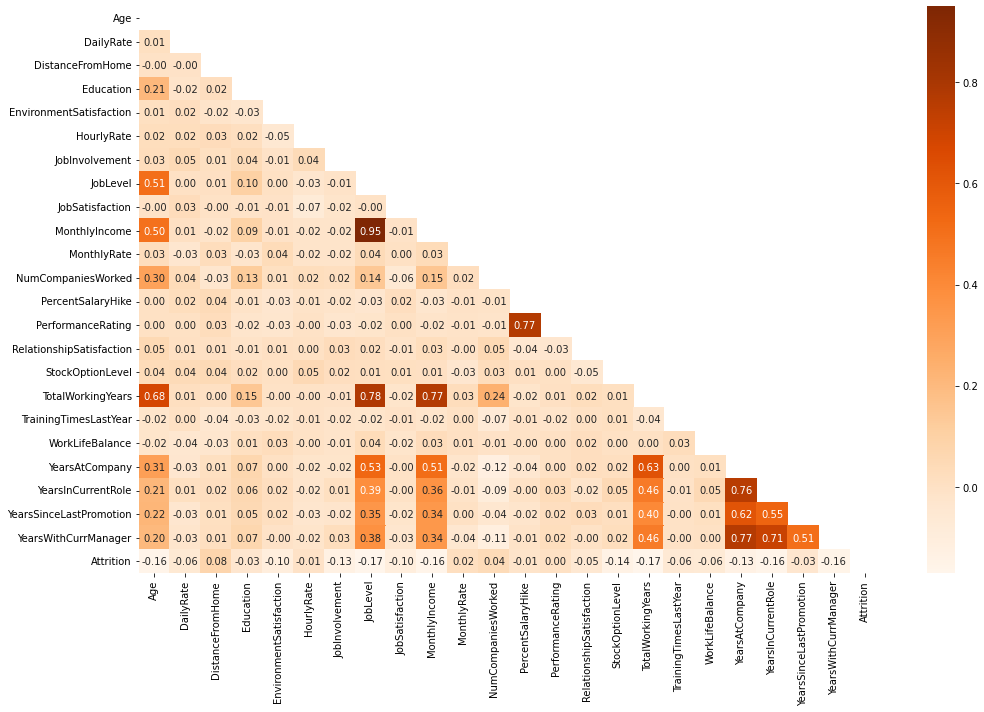

In [16]:
# visualization of correlation relationships
plt.figure(figsize=(15, 10))
mask = np.triu(corr_score)
sns.heatmap(corr_score,cmap="Oranges",annot = True, fmt = '.2f',mask = mask)
plt.tight_layout()
plt.savefig('corr.png');

In [17]:
# Drop the target column and get a clean dataframe with features
y = df['Attrition']
df_clean = df.drop(columns = ['Attrition'])

In [18]:
# apply one hot encoding to non numerical features
df_clean = pd.get_dummies(df_clean, columns = ['BusinessTravel', 'Gender','MaritalStatus'], drop_first = True)
df_clean = pd.get_dummies(df_clean)
df_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [19]:
# check the columns we have after feature engineering
print(list(df_clean.columns))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Directo

In [20]:
# check the shape for the new dataset
get_shape(df_clean)

Now there are 1470 rows and 47 columns in this dataset


In [21]:
# filter out features that needs to be standarized
col_tobe_standard = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                   'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                   'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                   'YearsWithCurrManager']

In [22]:
# standarization on numercial features so that all the numerical features are having the same type of normal distribution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in col_tobe_standard:
    df_clean[col] = df_clean[col].astype(float)
    df_clean[[col]] = scaler.fit_transform(df_clean[[col]])
df_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,1,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,0,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,-1.674841,1.324226,1,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,1.243211,-0.678049,1,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,0.325900,2.525591,0,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


#### 3. Model training and performance evaluation

Now we have obtained a new dataset with all features are useful and cleaned. We could move on to split the dataset into training set and testing set and feed them to different machine learning models and evaluate the performance of prediction.

In [23]:
# split dataset into training set and testing set with stratified sampling so that each dataset contains observations
# for both exit and non exit employees
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_clean,
                                                                    y,
                                                                    test_size=0.25,
                                                                    stratify = y)  
print('Training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('Test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

Training data has 1102 observation with 47 features
Test data has 368 observation with 47 features


In [24]:
# build different machine learning models with the same random state if applicable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score

lr = LogisticRegression(random_state = 6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 6)
dt = DecisionTreeClassifier(random_state = 6)
mlp = MLPClassifier(random_state = 6)
xg = xgb.XGBClassifier(random_state = 6)

In [25]:
# naive approach on each models without hyperparameter tuning
model_list = [lr,knn,rf,dt,mlp,xg]
score_res = []
for model in model_list:
    draft = model_selection.cross_val_score(model, X_train, y_train, cv = 5)
    score_res.append(draft)

In [26]:
# print out naive approach performance
model_names = ['Logistic Regression', 'KNN', 'Random Forest','Decision Tree','Neural Network','XG Boost']
idx = ['cv_1','cv_2','cv_3','cv_4','cv_5']
df_accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = idx).round(decimals=3)
print('='*60)
print('The Score is listed below \n\n',df_accuracy)
print('='*60)

The Score is listed below 

       Logistic Regression    KNN  Random Forest  Decision Tree  \
cv_1                0.851  0.842          0.819          0.810   
cv_2                0.900  0.846          0.869          0.747   
cv_3                0.877  0.859          0.859          0.814   
cv_4                0.877  0.855          0.868          0.791   
cv_5                0.868  0.827          0.850          0.818   

      Neural Network  XG Boost  
cv_1           0.855     0.846  
cv_2           0.900     0.878  
cv_3           0.864     0.873  
cv_4           0.882     0.882  
cv_5           0.841     0.841  


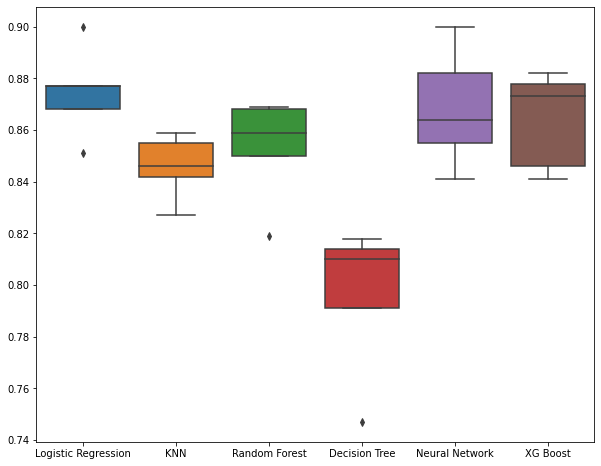

In [27]:
# visualize the performance of different machine learning models
plt.figure(figsize=(10, 8))
sns.boxplot(data = df_accuracy)
plt.savefig('draft.png');

It looks like decision tree is not performaning well compared with other models.

In [28]:
# helper function to get best parameters from best model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

In [38]:
# set kfold number for k fold cross validation method
kfold = model_selection.KFold(n_splits=10, random_state =6,shuffle=True)

In [31]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [39]:
# apply grid search on each hyperparameter and fit in with data
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=LogisticRegression(random_state=6),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [40]:
lr_res = grid_lr.cv_results_

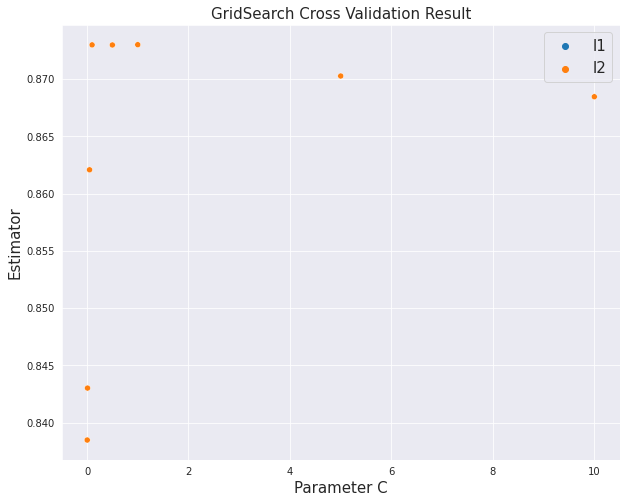

In [41]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_C', y = 'mean_test_score',hue = 'param_penalty',data = lr_res)
plt.xlabel('Parameter C',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig('LR.png');

In [42]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_lr)

Best Score: 0.873
Best Parameters:
C : 1
penalty : l2


In [43]:
best_lr_model = grid_lr.best_estimator_

In [44]:
# append the best model to the list for other evalution
best_models.append(('Logistic Regression', best_lr_model))

In [45]:
# hyperparameter tuning for K nearest neighbors
knn_params = {
    'n_neighbors':[3,5,7,9,11,13,15,17,21,31,59,61,63] 
}

In [46]:
# apply grid search on each hyperparameter and fit in with data
grid_knn = GridSearchCV(knn, knn_params, cv= kfold)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21, 31, 59,
                                         61, 63]})

In [47]:
knn_res = grid_knn.cv_results_

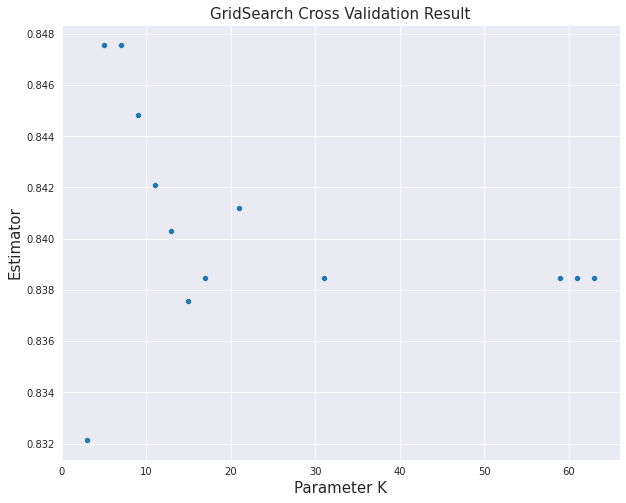

In [48]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_n_neighbors', y = 'mean_test_score',data = knn_res)
plt.xlabel('Parameter K',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.savefig('knn.png');

In [49]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_knn)

Best Score: 0.848
Best Parameters:
n_neighbors : 5


In [50]:
best_knn_model = grid_knn.best_estimator_

In [51]:
# append the best model to the list for other evalution
best_models.append(('K Nearest Neighbors',best_knn_model))

In [52]:
# hyperparameter tuning for random forest
params_rf = {
    'n_estimators': [20,40,60,80],
    'min_samples_split':[4,6,8],
    'max_depth': [1, 5, 10, 15],
    'max_features': ['sqrt', 'auto','log2']
}
grid_rf = GridSearchCV(rf,params_rf, cv=kfold)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=RandomForestClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80]})

In [53]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_rf)

Best Score: 0.859
Best Parameters:
max_depth : 15
max_features : log2
min_samples_split : 6
n_estimators : 20


In [54]:
rf_res = grid_rf.cv_results_

In [55]:
best_rf_model = grid_rf.best_estimator_

In [56]:
# append the best model to the list for other evalution
best_models.append(('Random Forest', best_rf_model))

In [57]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,15],
    'min_samples_split':[2,4,6,8,10]
}
grid_dt = GridSearchCV(dt,params_dt, cv=kfold)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [58]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_dt)

Best Score: 0.839
Best Parameters:
max_depth : 5
min_samples_split : 10


In [59]:
best_dt_model = grid_dt.best_estimator_

In [60]:
# append the best model to the list for other evalution
best_models.append(('Decision Tree', best_dt_model))

In [61]:
# hyperparameter tuning for multi layer perceptrons
params_mlp = {
    'hidden_layer_sizes': [(10,),(20,),(30,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1]
}
grid_mlp = GridSearchCV(mlp,params_mlp, cv = kfold)
grid_mlp.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=MLPClassifier(random_state=6),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10,), (20,), (30,)]})

In [62]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_mlp)

Best Score: 0.870
Best Parameters:
activation : tanh
alpha : 0.1
hidden_layer_sizes : (10,)


In [63]:
best_mlp_model = grid_mlp.best_estimator_

In [64]:
# append the best model to the list for other evalution
best_models.append(('Neural Network', best_mlp_model))

In [65]:
# hyperparameter tuning for extreme boosting tree aka xgboost
params_xgb = {
        'subsample': [0.4, 0.6, 0.8],
        'max_depth': [1,5,10,15],
        'n_estimators':[40,60,80],
        'reg_alpha':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'reg_lambda':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'eta':[0.4,0.6,0.8],
        'learning_rate':[0.1, 0.3, 0.5]
        }

In [66]:
from sklearn.model_selection import RandomizedSearchCV
grid_xgb = RandomizedSearchCV(xg, params_xgb,cv = kfold,n_iter = 50)
grid_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
                   estimator=XGBClassifier(random_state=6), n_iter=50,
                   param_distributions={'eta': [0.4, 0.6, 0.8],
                                        'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [1, 5, 10, 15],
                                        'n_estimators': [40, 60, 80],
                                        'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1,
                                                      5],
                                        'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1,
                                                       5],
                                        'subsample': [0.4, 0.6, 0.8]})

In [67]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_xgb)

Best Score: 0.876
Best Parameters:
subsample : 0.4
reg_lambda : 0.1
reg_alpha : 0.1
n_estimators : 60
max_depth : 1
learning_rate : 0.3
eta : 0.8


In [68]:
best_xgb_model = grid_xgb.best_estimator_

In [69]:
# append the best model to the list for other evalution
best_models.append(('Extreme Boosting Tree', best_xgb_model))

In [70]:
# print out the list of optimized models
for name,model in best_models:
    print(name)

Logistic Regression
K Nearest Neighbors
Random Forest
Decision Tree
Neural Network
Extreme Boosting Tree


In [71]:
# helper function to print out and visualize the evaluation result of each model including
# confusion matrix, precison-recall and f1 score
def plot_cm(models):
    sns.set_style('white')
    class_names = ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test,model.predict(X_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / (( 1 / precision) + ( 1 / recall))
        plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecell = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)), fontsize = 15)

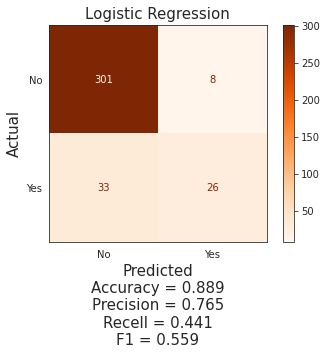

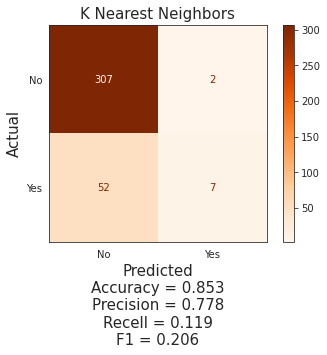

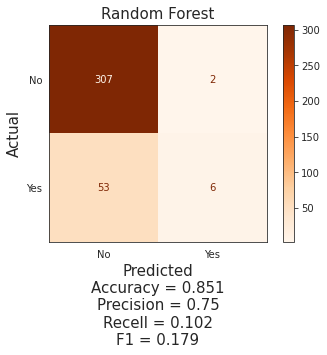

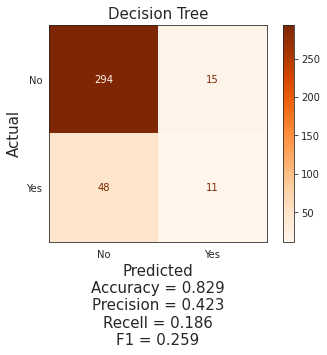

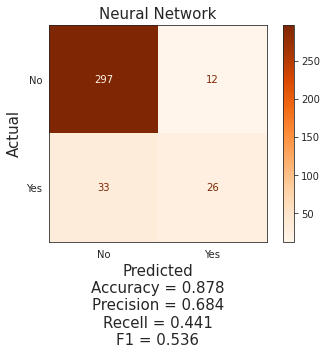

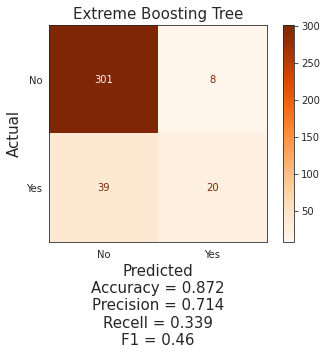

In [72]:
plot_cm(best_models)
plt.savefig('cm.png')

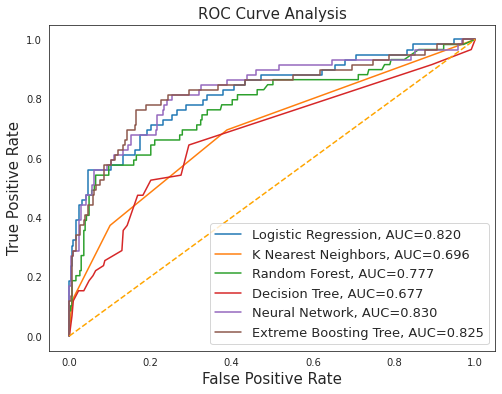

In [73]:
# visualize ROC curve for each optimized model
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for model_name, model in best_models:
        yproba = model.predict_proba(X_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        result_table = result_table.append({'classifiers':model_name,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC.png');

#### 4. Feature selection

In [74]:
# helper function to visualize feature importance from random forest and LASSO
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance', ascending = False)\
    .reset_index(drop = True)
    return df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'blue')
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(imp_df.columns[1], fontsize = 20)
    plt.ylabel(imp_df.columns[0], fontsize = 20)
    plt.tight_layout()

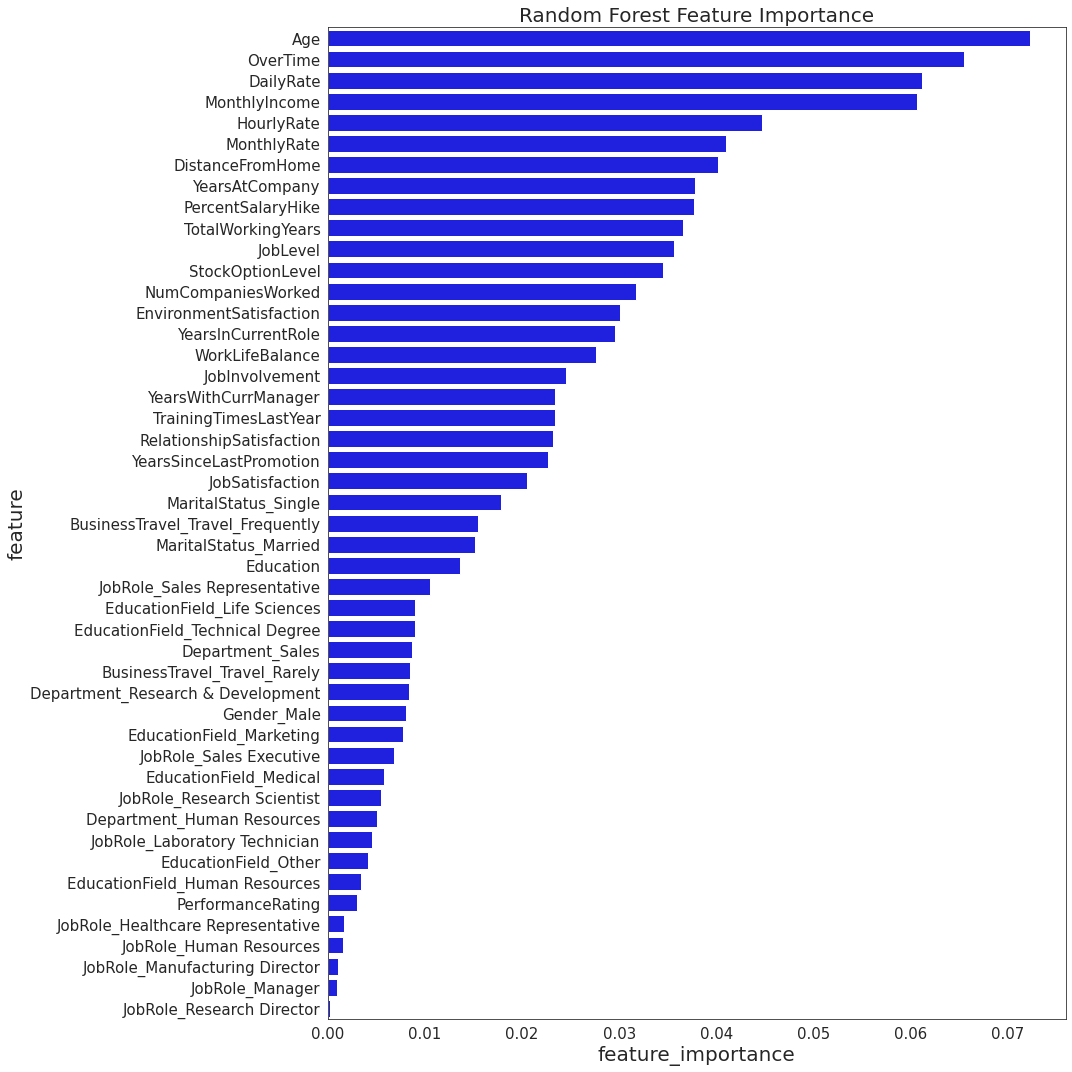

In [75]:
base_imp = imp_df(X_train.columns, best_rf_model.feature_importances_)
plt.figure(figsize=(15, 15))
var_imp_plot(base_imp, 'Random Forest Feature Importance')
plt.savefig('feature_importance.png')

In [76]:
# build a LASSO model for feature selection
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train, y_train)
coef = pd.DataFrame(reg.coef_, index = X_train.columns)
coef = imp_df(X_train.columns, reg.coef_)

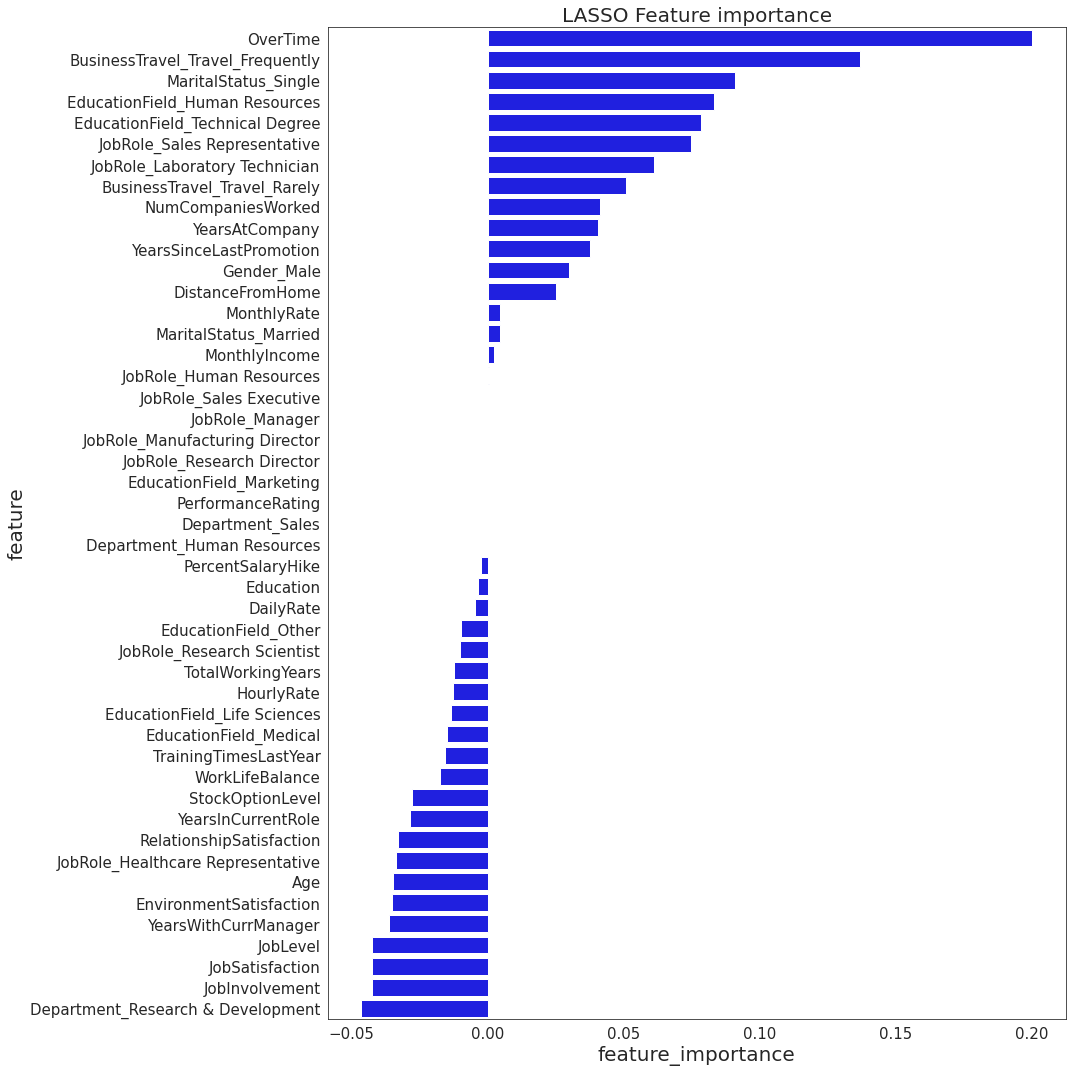

In [77]:
plt.figure(figsize=(15, 15))
var_imp_plot(coef, 'LASSO Feature importance')
plt.savefig('L1_feature_importance.png');